In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

/tmp/ipykernel_27685/3065426111.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Easy

In [2]:
data_train = pd.read_pickle('../data/train.pickle')
x_train = data_train['features']
y_train = data_train['labels']

data_test = pd.read_pickle('../data/test.pickle')
x_test = data_test['features']
y_test = data_test['labels']

In [3]:
x_train.shape

(34799, 32, 32, 3)

In [4]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [5]:
labels = pd.read_pickle('../data/labels.pickle')
labels

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing 

In [6]:
%%time
model = LogisticRegression(max_iter=100)
model.fit(x_train, y_train)
y_pred_lr = model.predict(x_test)

CPU times: user 5min 56s, sys: 1min 59s, total: 7min 56s
Wall time: 30.3 s


/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
balanced_accuracy_score(y_test, y_pred_lr)

0.7399774952886683

Balanced accuracy учитывает дисбаланс классов

In [8]:
f1_score(y_test, y_pred_lr, average='macro')

0.7552746287483505

Обоснование выбора метрики: метрика, которая отображает и precision, и recall, и при этом благодаря макроусреднению учитывает то, что модель может игнорировать классы, которых в датасете мало


In [9]:
mistakes = {}
for i in range(len(y_pred_lr)):
    if y_pred_lr[i] != y_test[i]:
        t = [y_pred_lr[i] , y_test[i]]
        t.sort()
        t = tuple(t)
        if t not in mistakes.keys():
            mistakes[t] = 1
        else:
            mistakes[t] += 1

In [10]:
max(mistakes, key=mistakes.get)

(1, 2)

In [11]:
print(labels[1], '\n'+labels[2]) # дорожные знаки, которые модель чаще всего путает

Speed limit (30km/h) 
Speed limit (50km/h)


# Medium

In [12]:
%%time
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred_knn = model.predict(x_test)

CPU times: user 3min 24s, sys: 52.2 s, total: 4min 17s
Wall time: 19.2 s


In [13]:
accuracy_score(y_test, y_pred_knn)

0.3847189231987332

In [14]:
%%time
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred_nb = model.predict(x_test)

CPU times: user 1min 8s, sys: 375 ms, total: 1min 8s
Wall time: 1min 7s


In [15]:
accuracy_score(y_test, y_pred_nb)

0.29271575613618367

In [16]:
%%time
model = SVC(kernel='linear', max_iter=50)
model.fit(x_train, y_train)
y_pred_svclin = model.predict(x_test)

/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


CPU times: user 5min 8s, sys: 1.24 s, total: 5min 10s
Wall time: 5min 8s


In [17]:
accuracy_score(y_test, y_pred_svclin)

0.5441013460015836

In [18]:
%%time
model = SVC(kernel='poly', max_iter=30)
model.fit(x_train, y_train)
y_pred_svcpoly = model.predict(x_test)

/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


CPU times: user 4min 33s, sys: 256 ms, total: 4min 33s
Wall time: 4min 33s


In [19]:
accuracy_score(y_test, y_pred_svcpoly)

0.06492478226444973

In [20]:
%%time
model = SVC(kernel='rbf', max_iter=30)
model.fit(x_train, y_train)
y_pred_svcrbf = model.predict(x_test)

/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


CPU times: user 6min 7s, sys: 321 ms, total: 6min 7s
Wall time: 6min 7s


In [21]:
accuracy_score(y_test, y_pred_svcrbf)

0.12771179730799684

Результаты обучения логистической регрессии в задаче easy.

Интерпретация:

Данных много и они распределены не очень равномерно (см. график ниже), поэтому в knn соседями могли оказаться объекты, каждый из которых имеет различный тип. 

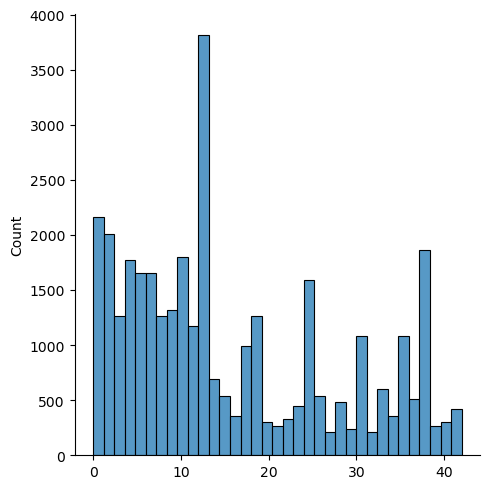

In [22]:
sns.displot(x=list(data_train['labels']))

Наивный байес предполагает, что фичи независимы, но многие знаки имеют похожую структуру (например, запрещающие знаки все имеют круглую форму и красную полосу по краю). 

Возможно, данные нельзя разделить линейно, поэтому линейное ядро SVM показывает не очень высокий результат.
Полиномиальное ядро SVM в целом менее точно.

Логистическая регрессия в sklearn использует all-versus-all алгоритм по дефолту, поэтому в силу большого количества классификаторов результаты хороши.

# Hard

Знаем, что на 35к изображений логистическая регрессия дает неплохой результат. Число используемых картинок можно уменьшить, если использовать скрипты из dataset_preparing.py. Для этого помогут методы `local_histogram_equalization`, `transformation_brightness_rotation`, `rotation_changing`, `brightness_changing`, `rgb_to_gray_data`.

Если с каждой картинкой произвести по одному изменению (и повернуть дважды или трижды), то можно уменьшить уменьшить количество используемых картинок до 5к.

Некоторые из этих модификаций были применены, результаты сохранены в файлах data0.pickle, ..., data8.pickle

In [23]:
data = pd.read_pickle('../data/data8.pickle')

In [24]:
len(list(data['y_train']))

86989

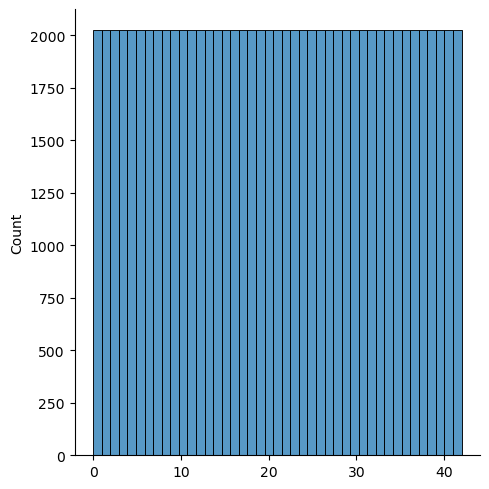

In [25]:
sns.displot(x=list(data['y_train']))

Распределение равномерное и данных, поэтому можем проверять гипотезу на подвыборке из трейна этого файла. Для выделения подвыборки используем train_test_split, т.к. параметр stratify позволяет выделить подвыборку с сохранением баланса классов.

In [26]:
accuracies = []
model = LogisticRegression(max_iter=50)

In [27]:
for i in tqdm(range(85000, 3000-1, -2000)):
    X_train1, _, y_train1, _ = train_test_split(data['x_train'], data['y_train'], train_size = (i / 86000), stratify=data['y_train'])
    X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, train_size = 0.8, stratify=y_train1)
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

  0%|                                                    | 0/42 [00:00<?, ?it/s]/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
  2%|█                                           | 1/42 [00:13<09:19, 13.64s/it]/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

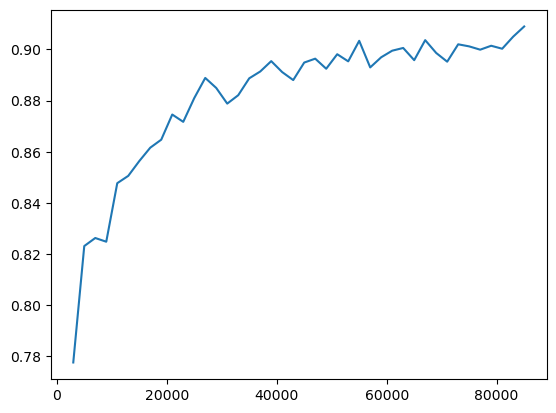

In [28]:
x = list(range(3000, 85001, 2000))
y = accuracies[::-1]
plt.plot(x, y)

Гипотеза не подтвердилась. Наибольший рост accuracy происходит при обучении на примерно 25к сэмплах, она возрастает до 0.89. Такого количества достаточно для обучении хорошей модели.